# 第四章

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

# Make the graphs a bit prettier, and bigger
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 5)
plt.rcParams['font.family'] = 'sans-serif'

# This is necessary to show lots of columns in pandas 0.12. 
# Not necessary in pandas 0.13.
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)

好的！ 我们将在这里回顾我们的自行车道数据集。 我住在蒙特利尔，我很好奇我们是一个通勤城市，还是以骑自行车为乐趣的城市 - 人们在周末还是工作日骑自行车？

## 4.1 向我们的`DataFrame`中刚添加`weekday`列
首先我们需要加载数据，我们之前已经做过了。

<AxesSubplot:xlabel='Date'>

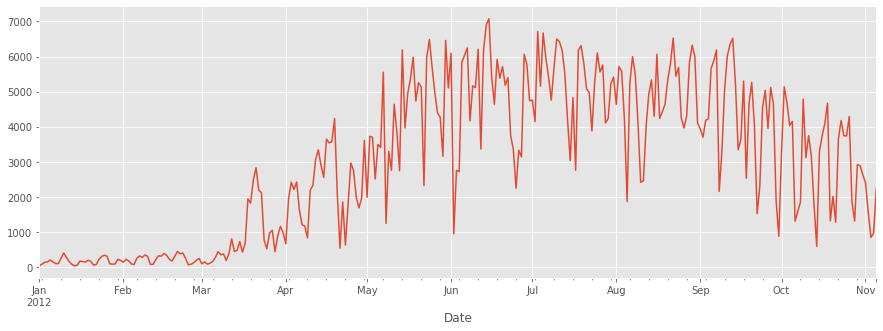

In [3]:
bikes = pd.read_csv('../data/bikes.csv',sep=';',encoding='latin1',parse_dates=['Date'],dayfirst=True,index_col='Date')
bikes['Berri 1'].plot()

接下来，我们只是看看 Berri 自行车道。 Berri 是蒙特利尔的一条街道，是一个相当重要的自行车道。 现在我习惯走这条路去图书馆，但我在旧蒙特利尔工作时，我习惯于走这条路去上班。
所以我们要创建一个只有 Berri 自行车道的`DataFrame`。

In [4]:
berri_bikes = bikes[['Berri 1']]
berri_bikes[:5]

,Berri 1
Date,
2012-01-01,35
2012-01-02,83
2012-01-03,135
2012-01-04,144
2012-01-05,197


接下来，我们需要添加一列`weekday`。 首先，我们可以从索引得到星期。 我们还没有谈到索引，但索引在上面的`DataFrame`中是左边的东西，在Date下面。 它基本上是一年中的所有日子。

In [5]:
berri_bikes.index

DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04', '2012-01-05', '2012-01-06', '2012-01-07', '2012-01-08', '2012-01-09', '2012-01-10',
               ...
               '2012-10-27', '2012-10-28', '2012-10-29', '2012-10-30', '2012-10-31', '2012-11-01', '2012-11-02', '2012-11-03', '2012-11-04', '2012-11-05'], dtype='datetime64[ns]', name='Date', length=310, freq=None)

你可以看到，实际上缺少一些日期 - 实际上只有一年的 310 天。 天知道为什么。

Pandas 有一堆非常棒的时间序列功能，所以如果我们想得到每一行的月份中的日期，我们可以这样做：

In [6]:
berri_bikes.index.day

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
            ...
            27, 28, 29, 30, 31,  1,  2,  3,  4,  5], dtype='int64', name='Date', length=310)

我们实际上想要星期：

In [7]:
berri_bikes.index.weekday

Int64Index([6, 0, 1, 2, 3, 4, 5, 6, 0, 1,
            ...
            5, 6, 0, 1, 2, 3, 4, 5, 6, 0], dtype='int64', name='Date', length=310)

这是周中的日期，其中 0 是星期一。我通过查询日历得到 0 是星期一。

现在我们知道了如何获取星期，我们可以将其添加到我们的`DataFrame`中作为一列：

In [8]:
berri_bikes['weekday'] = berri_bikes.index.weekday
berri_bikes[:5]

/var/folders/qp/w7t0hyg957d_xlc3kv2q49sw0000gn/T/ipykernel_11710/1633736244.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  berri_bikes['weekday'] = berri_bikes.index.weekday


,Berri 1,weekday
Date,,
2012-01-01,35,6
2012-01-02,83,0
2012-01-03,135,1
2012-01-04,144,2
2012-01-05,197,3


## 4.2 按星期统计骑手
这很易于实现！

`Dataframe`有一个类似于 `SQL groupby`的`.groupby()` 方法，如果你熟悉的话。 我现在不打算解释更多 - 如果你想知道更多，请见文档。

在这种情况下，`berri_bikes.groupby('weekday').aggregate(sum)` 意味着“按星期对行分组，然后将星期相同的所有值相加”。

In [9]:
weekday_counts = berri_bikes.groupby('weekday').aggregate(sum)
weekday_counts

,Berri 1
weekday,
0,134298
1,135305
2,152972
3,160131
4,141771
5,101578
6,99310


很难记住0, 1, 2, 3, 4, 5, 6是什么，所以让我们修复它并绘制出来：

In [10]:
weekday_counts.index = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
weekday_counts

,Berri 1
Monday,134298
Tuesday,135305
Wednesday,152972
Thursday,160131
Friday,141771
Saturday,101578
Sunday,99310


<AxesSubplot:>

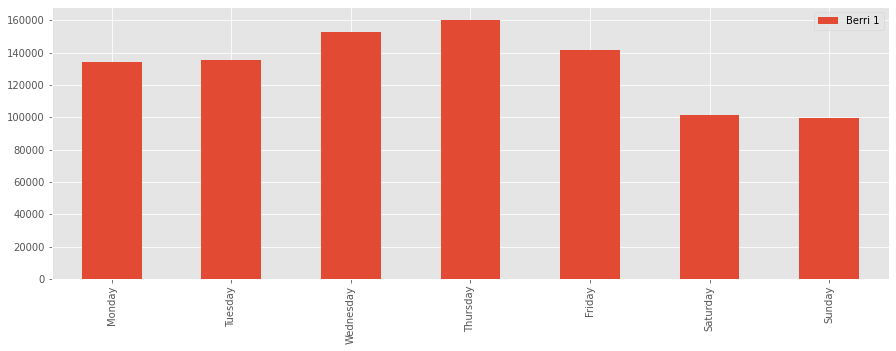

In [11]:
weekday_counts.plot(kind='bar')

所以看起来蒙特利尔是通勤骑自行车的人 - 他们在工作日骑自行车更多。

## 4.3 放到一起
让我们把所有的一起，证明它是多么容易。 6 行的神奇 Pandas！

如果你想玩一玩，尝试将sum变为max，np.median，或任何你喜欢的其他函数。

/var/folders/qp/w7t0hyg957d_xlc3kv2q49sw0000gn/T/ipykernel_11710/1440025429.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  berri_bikes['weekday'] = berri_bikes.index.weekday


<AxesSubplot:>

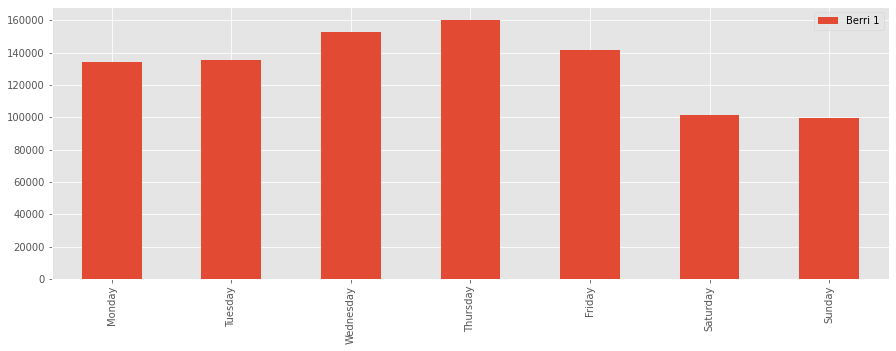

In [13]:
bikes = pd.read_csv('../data/bikes.csv',sep=';',encoding='latin1',parse_dates=['Date'],dayfirst=True,index_col='Date')

berri_bikes = bikes[['Berri 1']]
berri_bikes['weekday'] = berri_bikes.index.weekday

weekday_counts = berri_bikes.groupby('weekday').aggregate(sum)
weekday_counts.index = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
weekday_counts.plot(kind='bar')